## Authored by Nidhin Pramod and Rahul Nair
# Overview 
In the GoodReads Review Rating Prediction task, our primary objective is to predict ratings for a book based on the reviews and other features available in the dataset. We have identified this problem to be a multiclass classification problem where the different classes are ratings, ranging between 1 and 5. We have tried to make rating predictions by training various kinds of models on the review texts column. These review texts are textual data that has been preprocessed and converted to corresponding word embedding vectors which are then used to train the model. During the course of this project, we have gained experience of working with various embedding techniques such as Bag of Words Vectorizer, TF-IDF vectorizer, Word2Vec, and also pre-trained embedding vector such as GloVe. We have also gained knowledge on different preprocessing techniques and complex neural networks. One key observation we had is that tuning the hyperparameters, dropout regularization, and the word embedding technique used, plays an important role in improving overall performance. Considering this, we recommend using word embeddings from a transformer-based model such as BERT, in conjunction with a neural network such as Bidirectional LSTM to develop an accurate review rating prediction model.

# Modelling Methodology
Through exploratory data analysis, we noticed that columns such as user_id, book_id, date_added, date_updated, read_at, started_at, n_votes and n_comments had low correlation with the actual ratings. Hence we have used only the review_text column to train the model. We can also notice that the dataset is not balanced as ratings 1 and 2 are a minority and appear only 46465 and 56423 times respectively, while other ratings 3, 4, and 5 appear to have over 14000 occurrences. To correct this imbalance we tried techniques such as undersampling and using class weights while training the model to give more weightage to the minority classes.

The textual data of the reviews had to be converted to a numerical representation in order to train the machine learning and neural network models. To do this,  we have experimented with several different approaches. Initially for the baseline ML model we used a TF-IDF vectorizer as we found that the performance was better when compared to a basic count vectorizer. Before vectorizing the sentences, they were cleaned by removing stop words using gensim’s remove stop word function. However, for neural network models, we have performed more advanced data preprocessing. We created a function to remove spaces, HTML tags, single characters, punctuations, numbers, and stop words. The stop word list was obtained from nltk. Although gensim’s simple_preprocess function does something similar, we found that our custom function was better at stop word removal as it made use of nltk stop word list which is bigger than the list used by gensim. Next, the sentences were tokenized using Keras’s Tokenizer function. In the next step, the tokenized words were padded to a maximum length of 130, based on word count distribution upto 3rd quartile of the dataset. Once the data was cleaned we used two different techniques to generate word embeddings. Initially, we tried generating our own Word2Vec embedding vector using the vocab from our dataset corpus. We then used a GloVe pre-trained embedding to generate word embeddings for words in our dataset. We found that the models performed better when we used GloVe.

For splitting the data into training and testing sets we have used sklearn’s train_test_split function and the test size is set to 20% of the total dataset. As the dataset is imbalanced, we have stratified the splitting based on the rating column to ensure that both the training and testing sets have an equal distribution of all classes.

# Model Description

Moving on to model training, we first employ a baseline Machine learning model Multinomial Naïve Bayes classifier. The model was trained on review_texts which were vectorized using TF-IDF vectorizer after stop-word removal. The Naïve Bayes model was chosen as it had better performance compared to another Logistic regression model that we had experimented with.

Second, we employ a simple neural network with 5 different configurations of neurons in the hidden layer. This model is trained on review texts which have been converted to corresponsing word embedding vectors using a GloVe pre-trained embedding vector. The first layer used is an embedding layer. The weights provided to this layer is an embedding matrix that was created for the tokenized sentences in the dataset using GloVe embeddings. We have used ‘Relu’ activation function for the hidden layer and the output layer uses a softmax activation function. The output layer has 5 neurons each representing the probability that a review belongs to one of the 5 rating classes. Dropout regularization has been implemented to prevent the overfitting of the model. The model is then compiled using Adam optimizer and the loss function used here is categorical cross-entropy. This is because the target variable(rating) has been One Hot encoded before training.

Next, we employ a deep neural network and experiment with the number of layers ranging from 4 to 6 and test the efficiency of different activation functions such as ReLu, Leaky ReLu and Tanh. The logic for the input and output layers remains the same as what was used in the previous simple neural network. Along the same lines, the logic for the parameters used while compiling the model and the loss function used also remains the same. Out of the different activation functions tested, Leaky Relu activation function gave us the best results.
Lastly, for the complex neural network part, we employ two RNNs, the first one being a vanilla LSTM with dropouts and the second one a Bidirectional LSTM with Leaky ReLu activation function. The input, and output layers and parameters of compiling follow the same logic used in previous models. The Bidirectional LSTM model has 2 bidirectional LSTM layers with 180 and 130 neurons and 1 hidden layer with 80 neurons. This model gave us the best overall results in terms of prediction accuracy. Finally, we also implemented a simple neural network that made use of BERT preprocessing and word embeddings, however, due to resource constraints we could not train the model with better hyperparameters.



In [ ]:
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np 
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from keras.preprocessing.text import one_hot, Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
nltk.download('stopwords')

from google.colab import drive
#data = pd.read_csv("/kaggle/input/cs985-cs987-goodread-class-project/my_goodreads_train.csv")
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/my_goodreads_train.csv")
df = data.drop(['user_id','book_id','date_added','date_updated','read_at','started_at'],axis=1)
df.head()

# Baseline Model

In [ ]:
for rec in df.columns:
    print(rec,df[rec].isna().sum())

review_id 0
rating 0
review_text 0
n_votes 0
n_comments 0


<AxesSubplot:xlabel='rating', ylabel='count'>

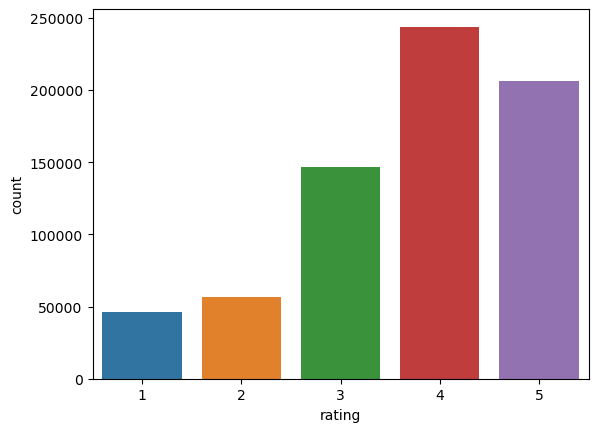

In [ ]:
import seaborn as sns
sns.countplot(x='rating', data=df)

In [ ]:
raw_text = df['review_text']
Y = df ['rating']

In [ ]:
'''
vectorizer = CountVectorizer()
vectorizer.fit(raw_text)

reviews_train = vectorizer.transform(raw_text)
reviews_test  = vectorizer.transform(raw_text)
reviews_train
'''

## Preprocess

In [ ]:
import gensim
from gensim.parsing.preprocessing import remove_stopwords

X_nostopword = raw_text.apply(remove_stopwords)

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_nostopword)

In [ ]:
a = vectorizer.get_feature_names_out()
a[10000:10010]

array(['adopest', 'adopeted', 'adopitive', 'adopt', 'adoptable',
       'adoptabookaus', 'adoptabookausblog', 'adopted', 'adoptee',
       'adoptees'], dtype=object)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)
print(X_train.shape)
print(X_test.shape)

(560000, 260952)
(140000, 260952)


In [ ]:
nb_model = MultinomialNB().fit(X_train, Y_train)

## Predict

In [ ]:
predicted = nb_model.predict(X_test)
nb_accuracy = metrics.accuracy_score(Y_test,predicted)
#printing accuracy, Confusion matrix, Precision and Recall
print('\n Accuracy of the classifier is',nb_accuracy)
print('\n Confusion matrix')
print(metrics.confusion_matrix(Y_test,predicted))


 Accuracy of the classifier is 0.43766428571428573

 Confusion matrix
[[  198     3   756  6918  1418]
 [   22     4  1176  9610   473]
 [   11     2  1095 26856  1414]
 [   16     1   248 41571  6930]
 [   11     2    32 22828 18405]]


# Simple Neural Network

In [ ]:
raw_text = df['review_text']
Y = df ['rating']

Pre processing using gensim simple_preprocess function

In [ ]:
'''
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords

#X_nostopword = raw_text.apply(remove_stopwords)
text = "This is an example sentence with some Stop Words and UPPERCASE words."
text = remove_stopwords(text)
tokens = simple_preprocess(text, deacc=True, min_len=2, max_len=15)
print(tokens)
'''

'\nfrom gensim.utils import simple_preprocess\nfrom gensim.parsing.preprocessing import remove_stopwords\n\n#X_nostopword = raw_text.apply(remove_stopwords)\ntext = "This is an example sentence with some Stop Words and UPPERCASE words."\ntext = remove_stopwords(text)\ntokens = simple_preprocess(text, deacc=True, min_len=2, max_len=15)\nprint(tokens)\n'

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    '''Removes HTML tags'''

    return TAG_RE.sub('', text)

In [ ]:
def preprocess_text(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove html tags
    sentence = remove_tags(sentence)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence

In [ ]:
X = []
sentences = list(raw_text)
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
X_df = pd.DataFrame(X,columns=["Review"])
X_df['count']=X_df['Review'].str.split().apply(len)
X_df['count'].describe()

count    700000.000000
mean         93.213720
std         108.818178
min           0.000000
25%          20.000000
50%          53.000000
75%         128.000000
max        1692.000000
Name: count, dtype: float64

## Train Test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42,stratify=Y)

In [ ]:
y_train=to_categorical(y_train)
y_train=pd.DataFrame(y_train).drop([0],axis=1)

y_test=to_categorical(y_test)
y_test=pd.DataFrame(y_test).drop([0],axis=1)


In [ ]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [ ]:
vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

227346

In [ ]:
from keras.utils import pad_sequences
maxlen = 130 #chosen based on word count distribution upto 3rd quartile

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

## Loading GloVe Embedding vector

In [ ]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/kaggle/input/glove-embeddings/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
# Create Embedding Matrix having 100 columns 
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
'''
#Word2Vec
review_text = df['review_text'].apply(gensim.utils.simple_preprocess)

model_vec = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4
)
model_vec.build_vocab(review_text,progress_per=100)
model_vec.train(review_text,total_examples=model_vec.corpus_count,epochs=model_vec.epochs)
print("The no of words :",len(model_vec.wv))
vocab = list(model_vec.wv.index_to_key)
word_vec_dict={}
for word in vocab:
  word_vec_dict[word]=model_vec.wv.get_vector(word)
print("The no of key-value pairs : ",len(word_vec_dict))
'''

'\n#Word2Vec\nreview_text = df[\'review_text\'].apply(gensim.utils.simple_preprocess)\n\nmodel_vec = gensim.models.Word2Vec(\n    window=10,\n    min_count=2,\n    workers=4\n)\nmodel_vec.build_vocab(review_text,progress_per=100)\nmodel_vec.train(review_text,total_examples=model_vec.corpus_count,epochs=model_vec.epochs)\nprint("The no of words :",len(model_vec.wv))\nvocab = list(model_vec.wv.index_to_key)\nword_vec_dict={}\nfor word in vocab:\n  word_vec_dict[word]=model_vec.wv.get_vector(word)\nprint("The no of key-value pairs : ",len(word_vec_dict))\n'

## Simple Neural Network Model Training

In [ ]:
simple_nn_ln = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
simple_nn_ln.add(embedding_layer)
simple_nn_ln.add(Flatten())
simple_nn_ln.add(Dense(10,activation='relu'))
simple_nn_ln.add(Dropout(0.3))
simple_nn_ln.add(Dense(5, activation='softmax'))

simple_nn_ln.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(simple_nn_ln.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 100)          22734600  
                                                                 
 flatten (Flatten)           (None, 13000)             0         
                                                                 
 dense (Dense)               (None, 10)                130010    
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
Total params: 22,864,665
Trainable params: 130,065
Non-trainable params: 22,734,600
_________________________________________________________________
None


In [ ]:
simple_nn_ln_hist = simple_nn_ln.fit(X_train, y_train,
                    epochs=30,
                    verbose=1,
                    validation_split=0.3,
                    batch_size=256)


Epoch 1/30
1532/1532 [==============================] - 15s 7ms/step - loss: 1.3752 - acc: 0.3883 - val_loss: 1.3047 - val_acc: 0.4189
Epoch 2/30
1532/1532 [==============================] - 10s 6ms/step - loss: 1.3251 - acc: 0.4099 - val_loss: 1.2958 - val_acc: 0.4239
Epoch 3/30
1532/1532 [==============================] - 13s 8ms/step - loss: 1.3091 - acc: 0.4185 - val_loss: 1.2895 - val_acc: 0.4271
Epoch 4/30
1532/1532 [==============================] - 10s 6ms/step - loss: 1.2985 - acc: 0.4234 - val_loss: 1.2879 - val_acc: 0.4300
Epoch 5/30
1532/1532 [==============================] - 10s 6ms/step - loss: 1.2904 - acc: 0.4269 - val_loss: 1.2870 - val_acc: 0.4282
Epoch 6/30
1532/1532 [==============================] - 11s 7ms/step - loss: 1.2827 - acc: 0.4307 - val_loss: 1.2826 - val_acc: 0.4329
Epoch 7/30
1532/1532 [==============================] - 10s 7ms/step - loss: 1.2762 - acc: 0.4346 - val_loss: 1.2903 - val_acc: 0.4263
Epoch 8/30
1532/1532 [==============================] -

In [ ]:
#simple_nn_ln_hist
#simple_nn_40_hist
#simple_nn_100_hist

In [ ]:
simple_nn_40 = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
simple_nn_40.add(embedding_layer)
simple_nn_40.add(Flatten())
simple_nn_40.add(Dense(40,activation='relu'))
simple_nn_40.add(Dropout(0.3))
simple_nn_40.add(Dense(5, activation='softmax'))

simple_nn_40.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(simple_nn_40.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 130, 100)          22734600  
                                                                 
 flatten_2 (Flatten)         (None, 13000)             0         
                                                                 
 dense_4 (Dense)             (None, 40)                520040    
                                                                 
 dropout_2 (Dropout)         (None, 40)                0         
                                                                 
 dense_5 (Dense)             (None, 5)                 205       
                                                                 
Total params: 23,254,845
Trainable params: 520,245
Non-trainable params: 22,734,600
_________________________________________________________________
None


In [ ]:
simple_nn_40_hist = simple_nn_40.fit(X_train, y_train,
                    epochs=30,
                    verbose=1,
                    validation_split=0.3,
                    batch_size=256)

Epoch 1/30
1532/1532 [==============================] - 12s 7ms/step - loss: 1.3406 - acc: 0.4025 - val_loss: 1.2807 - val_acc: 0.4312
Epoch 2/30
1532/1532 [==============================] - 11s 7ms/step - loss: 1.2836 - acc: 0.4293 - val_loss: 1.2689 - val_acc: 0.4374
Epoch 3/30
1532/1532 [==============================] - 10s 7ms/step - loss: 1.2620 - acc: 0.4397 - val_loss: 1.2669 - val_acc: 0.4398
Epoch 4/30
1532/1532 [==============================] - 10s 6ms/step - loss: 1.2454 - acc: 0.4472 - val_loss: 1.2674 - val_acc: 0.4392
Epoch 5/30
1532/1532 [==============================] - 11s 7ms/step - loss: 1.2321 - acc: 0.4533 - val_loss: 1.2680 - val_acc: 0.4406
Epoch 6/30
1532/1532 [==============================] - 10s 7ms/step - loss: 1.2200 - acc: 0.4574 - val_loss: 1.2731 - val_acc: 0.4403
Epoch 7/30
1532/1532 [==============================] - 10s 6ms/step - loss: 1.2076 - acc: 0.4631 - val_loss: 1.2756 - val_acc: 0.4387
Epoch 8/30
1532/1532 [==============================] -

In [ ]:
simple_nn_70 = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
simple_nn_70.add(embedding_layer)
simple_nn_70.add(Flatten())
simple_nn_70.add(Dense(70,activation='relu'))
simple_nn_70.add(Dropout(0.3))
simple_nn_70.add(Dense(5, activation='softmax'))

simple_nn_70.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(simple_nn_70.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 130, 100)          22734600  
                                                                 
 flatten_4 (Flatten)         (None, 13000)             0         
                                                                 
 dense_8 (Dense)             (None, 70)                910070    
                                                                 
 dropout_4 (Dropout)         (None, 70)                0         
                                                                 
 dense_9 (Dense)             (None, 5)                 355       
                                                                 
Total params: 23,645,025
Trainable params: 910,425
Non-trainable params: 22,734,600
_________________________________________________________________
None


In [ ]:
simple_nn_70_hist = simple_nn_70.fit(X_train, y_train,
                    epochs=30,
                    verbose=1,
                    validation_split=0.3,
                    batch_size=256)

Epoch 1/30
1532/1532 [==============================] - 12s 7ms/step - loss: 1.3257 - acc: 0.4103 - val_loss: 1.2743 - val_acc: 0.4359
Epoch 2/30
1532/1532 [==============================] - 11s 7ms/step - loss: 1.2709 - acc: 0.4370 - val_loss: 1.2646 - val_acc: 0.4419
Epoch 3/30
1532/1532 [==============================] - 11s 7ms/step - loss: 1.2468 - acc: 0.4483 - val_loss: 1.2620 - val_acc: 0.4426
Epoch 4/30
1532/1532 [==============================] - 11s 7ms/step - loss: 1.2255 - acc: 0.4577 - val_loss: 1.2644 - val_acc: 0.4423
Epoch 5/30
1532/1532 [==============================] - 11s 7ms/step - loss: 1.2065 - acc: 0.4663 - val_loss: 1.2676 - val_acc: 0.4427
Epoch 6/30
1532/1532 [==============================] - 11s 7ms/step - loss: 1.1883 - acc: 0.4740 - val_loss: 1.2764 - val_acc: 0.4415
Epoch 7/30
1532/1532 [==============================] - 11s 7ms/step - loss: 1.1697 - acc: 0.4828 - val_loss: 1.2844 - val_acc: 0.4385
Epoch 8/30
1532/1532 [==============================] -

In [ ]:
simple_nn_100 = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
simple_nn_100.add(embedding_layer)
simple_nn_100.add(Flatten())
simple_nn_100.add(Dense(100,activation='relu'))
simple_nn_100.add(Dropout(0.40))
simple_nn_100.add(Dense(5, activation='softmax'))

simple_nn_100.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(simple_nn_100.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 130, 100)          22734600  
                                                                 
 flatten_5 (Flatten)         (None, 13000)             0         
                                                                 
 dense_10 (Dense)            (None, 100)               1300100   
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 5)                 505       
                                                                 
Total params: 24,035,205
Trainable params: 1,300,605
Non-trainable params: 22,734,600
_________________________________________________________________
None


In [ ]:
simple_nn_100_hist = simple_nn_100.fit(X_train, y_train,
                    epochs=30,
                    verbose=1,
                    validation_split=0.3,
                    batch_size=256)

Epoch 1/30
1532/1532 [==============================] - 12s 7ms/step - loss: 1.3404 - acc: 0.4031 - val_loss: 1.2814 - val_acc: 0.4295
Epoch 2/30
1532/1532 [==============================] - 10s 7ms/step - loss: 1.2841 - acc: 0.4292 - val_loss: 1.2680 - val_acc: 0.4369
Epoch 3/30
1532/1532 [==============================] - 10s 7ms/step - loss: 1.2626 - acc: 0.4388 - val_loss: 1.2668 - val_acc: 0.4394
Epoch 4/30
1532/1532 [==============================] - 11s 7ms/step - loss: 1.2434 - acc: 0.4494 - val_loss: 1.2686 - val_acc: 0.4377
Epoch 5/30
1532/1532 [==============================] - 10s 7ms/step - loss: 1.2261 - acc: 0.4568 - val_loss: 1.2704 - val_acc: 0.4371
Epoch 6/30
1532/1532 [==============================] - 10s 7ms/step - loss: 1.2101 - acc: 0.4639 - val_loss: 1.2736 - val_acc: 0.4393
Epoch 7/30
1532/1532 [==============================] - 11s 7ms/step - loss: 1.1941 - acc: 0.4708 - val_loss: 1.2728 - val_acc: 0.4390
Epoch 8/30
1532/1532 [==============================] -

In [ ]:
simple_nn_130 = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
simple_nn_130.add(embedding_layer)
simple_nn_130.add(Flatten())
simple_nn_130.add(Dense(130,activation='relu'))
simple_nn_130.add(Dropout(0.40))
simple_nn_130.add(Dense(5, activation='softmax'))

simple_nn_130.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(simple_nn_130.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 130, 100)          22734600  
                                                                 
 flatten_6 (Flatten)         (None, 13000)             0         
                                                                 
 dense_12 (Dense)            (None, 130)               1690130   
                                                                 
 dropout_6 (Dropout)         (None, 130)               0         
                                                                 
 dense_13 (Dense)            (None, 5)                 655       
                                                                 
Total params: 24,425,385
Trainable params: 1,690,785
Non-trainable params: 22,734,600
_________________________________________________________________
None


In [ ]:
simple_nn_130_hist = simple_nn_130.fit(X_train, y_train,
                    epochs=30,
                    verbose=1,
                    validation_split=0.3,
                    batch_size=256)

Epoch 1/30
1532/1532 [==============================] - 12s 7ms/step - loss: 1.3351 - acc: 0.4071 - val_loss: 1.2757 - val_acc: 0.4296
Epoch 2/30
1532/1532 [==============================] - 11s 7ms/step - loss: 1.2797 - acc: 0.4329 - val_loss: 1.2650 - val_acc: 0.4419
Epoch 3/30
1532/1532 [==============================] - 11s 7ms/step - loss: 1.2563 - acc: 0.4434 - val_loss: 1.2601 - val_acc: 0.4398
Epoch 4/30
1532/1532 [==============================] - 11s 7ms/step - loss: 1.2357 - acc: 0.4534 - val_loss: 1.2639 - val_acc: 0.4431
Epoch 5/30
1532/1532 [==============================] - 11s 7ms/step - loss: 1.2165 - acc: 0.4625 - val_loss: 1.2653 - val_acc: 0.4414
Epoch 6/30
1532/1532 [==============================] - 11s 7ms/step - loss: 1.1961 - acc: 0.4723 - val_loss: 1.2748 - val_acc: 0.4410
Epoch 7/30
1532/1532 [==============================] - 11s 7ms/step - loss: 1.1762 - acc: 0.4807 - val_loss: 1.2784 - val_acc: 0.4393
Epoch 8/30
1532/1532 [==============================] -

In [ ]:
print(simple_nn_130.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 130, 100)          22734600  
                                                                 
 flatten_6 (Flatten)         (None, 13000)             0         
                                                                 
 dense_12 (Dense)            (None, 130)               1690130   
                                                                 
 dropout_6 (Dropout)         (None, 130)               0         
                                                                 
 dense_13 (Dense)            (None, 5)                 655       
                                                                 
Total params: 24,425,385
Trainable params: 1,690,785
Non-trainable params: 22,734,600
_________________________________________________________________
None


In [ ]:
test_loss, test_accuracy = simple_nn_130.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

4375/4375 [==============================] - 18s 4ms/step - loss: 1.6624 - acc: 0.4161
Test Loss: 1.662400245666504
Test Accuracy: 0.41607141494750977


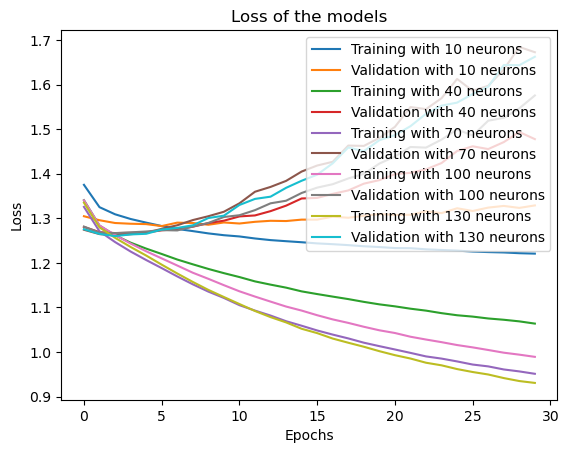

In [ ]:
plt.plot(simple_nn_ln_hist.history['loss'],label='Training with 10 neurons')
plt.plot(simple_nn_ln_hist.history['val_loss'],label='Validation with 10 neurons')
plt.plot(simple_nn_40_hist.history['loss'],label='Training with 40 neurons')
plt.plot(simple_nn_40_hist.history['val_loss'],label='Validation with 40 neurons')
plt.plot(simple_nn_70_hist.history['loss'],label='Training with 70 neurons')
plt.plot(simple_nn_70_hist.history['val_loss'],label='Validation with 70 neurons')
plt.plot(simple_nn_100_hist.history['loss'],label='Training with 100 neurons')
plt.plot(simple_nn_100_hist.history['val_loss'],label='Validation with 100 neurons')
plt.plot(simple_nn_130_hist.history['loss'],label='Training with 130 neurons')
plt.plot(simple_nn_130_hist.history['val_loss'],label='Validation with 130 neurons')
plt.title("Loss of the models")
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend()
plt.show()

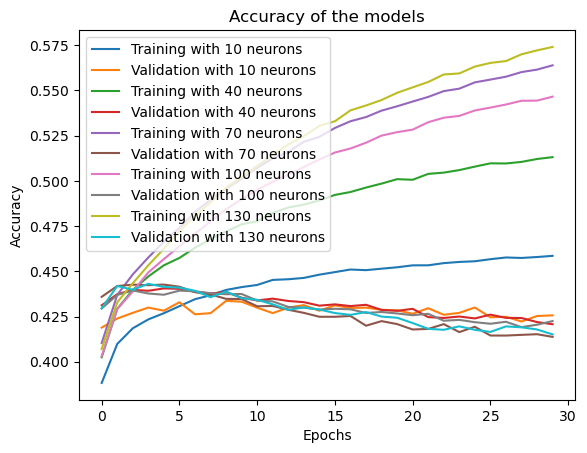

In [ ]:
plt.plot(simple_nn_ln_hist.history['acc'],label='Training with 10 neurons')
plt.plot(simple_nn_ln_hist.history['val_acc'],label='Validation with 10 neurons')
plt.plot(simple_nn_40_hist.history['acc'],label='Training with 40 neurons')
plt.plot(simple_nn_40_hist.history['val_acc'],label='Validation with 40 neurons')
plt.plot(simple_nn_70_hist.history['acc'],label='Training with 70 neurons')
plt.plot(simple_nn_70_hist.history['val_acc'],label='Validation with 70 neurons')
plt.plot(simple_nn_100_hist.history['acc'],label='Training with 100 neurons')
plt.plot(simple_nn_100_hist.history['val_acc'],label='Validation with 100 neurons')
plt.plot(simple_nn_130_hist.history['acc'],label='Training with 130 neurons')
plt.plot(simple_nn_130_hist.history['val_acc'],label='Validation with 130 neurons')
plt.title("Accuracy of the models")
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Deep Neural Network Model

In [ ]:
deep_nn_4 = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
deep_nn_4.add(embedding_layer)
deep_nn_4.add(Flatten())
deep_nn_4.add(Dense(160, activation='relu'))
deep_nn_4.add(Dropout(0.3))
deep_nn_4.add(Dense(80, activation='relu'))
deep_nn_4.add(Dropout(0.3))
deep_nn_4.add(Dense(5, activation='softmax'))

deep_nn_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(deep_nn_4.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 130, 100)          22734600  
                                                                 
 flatten_7 (Flatten)         (None, 13000)             0         
                                                                 
 dense_14 (Dense)            (None, 160)               2080160   
                                                                 
 dropout_7 (Dropout)         (None, 160)               0         
                                                                 
 dense_15 (Dense)            (None, 80)                12880     
                                                                 
 dropout_8 (Dropout)         (None, 80)                0         
                                                                 
 dense_16 (Dense)            (None, 5)                

In [ ]:
deep_nn_hist_4 = deep_nn_4.fit(X_train, y_train, batch_size=256, epochs=15, verbose=1, validation_split=0.3)

Epoch 1/15
1532/1532 [==============================] - 14s 8ms/step - loss: 1.3418 - acc: 0.4015 - val_loss: 1.2781 - val_acc: 0.4353
Epoch 2/15
1532/1532 [==============================] - 12s 8ms/step - loss: 1.2784 - acc: 0.4335 - val_loss: 1.2680 - val_acc: 0.4392
Epoch 3/15
1532/1532 [==============================] - 11s 7ms/step - loss: 1.2532 - acc: 0.4453 - val_loss: 1.2674 - val_acc: 0.4406
Epoch 4/15
1532/1532 [==============================] - 14s 9ms/step - loss: 1.2311 - acc: 0.4561 - val_loss: 1.2622 - val_acc: 0.4435
Epoch 5/15
1532/1532 [==============================] - 12s 8ms/step - loss: 1.2089 - acc: 0.4657 - val_loss: 1.2620 - val_acc: 0.4446
Epoch 6/15
1532/1532 [==============================] - 11s 7ms/step - loss: 1.1874 - acc: 0.4756 - val_loss: 1.2680 - val_acc: 0.4402
Epoch 7/15
1532/1532 [==============================] - 12s 8ms/step - loss: 1.1666 - acc: 0.4847 - val_loss: 1.2764 - val_acc: 0.4372
Epoch 8/15
1532/1532 [==============================] -

In [ ]:
deep_nn_5 = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
deep_nn_5.add(embedding_layer)
deep_nn_5.add(Flatten())
deep_nn_5.add(Dense(160, activation='relu'))
deep_nn_5.add(Dropout(0.4))
deep_nn_5.add(Dense(80, activation='relu'))
deep_nn_5.add(Dropout(0.3))
deep_nn_5.add(Dense(60, activation='relu'))
deep_nn_5.add(Dropout(0.2))
deep_nn_5.add(Dense(5, activation='softmax'))
deep_nn_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

deep_nn_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(deep_nn_5.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 130, 100)          22734600  
                                                                 
 flatten_10 (Flatten)        (None, 13000)             0         
                                                                 
 dense_23 (Dense)            (None, 160)               2080160   
                                                                 
 dropout_14 (Dropout)        (None, 160)               0         
                                                                 
 dense_24 (Dense)            (None, 80)                12880     
                                                                 
 dropout_15 (Dropout)        (None, 80)                0         
                                                                 
 dense_25 (Dense)            (None, 60)              

In [ ]:
deep_nn_hist_5 = deep_nn_5.fit(X_train, y_train, batch_size=256, epochs=15, verbose=1, validation_split=0.3)

Epoch 1/15
1532/1532 [==============================] - 14s 8ms/step - loss: 1.3553 - acc: 0.3930 - val_loss: 1.2913 - val_acc: 0.4313
Epoch 2/15
1532/1532 [==============================] - 13s 8ms/step - loss: 1.2949 - acc: 0.4261 - val_loss: 1.2827 - val_acc: 0.4338
Epoch 3/15
1532/1532 [==============================] - 12s 8ms/step - loss: 1.2709 - acc: 0.4365 - val_loss: 1.2685 - val_acc: 0.4410
Epoch 4/15
1532/1532 [==============================] - 12s 8ms/step - loss: 1.2529 - acc: 0.4456 - val_loss: 1.2632 - val_acc: 0.4432
Epoch 5/15
1532/1532 [==============================] - 12s 8ms/step - loss: 1.2372 - acc: 0.4525 - val_loss: 1.2631 - val_acc: 0.4422
Epoch 6/15
1532/1532 [==============================] - 12s 8ms/step - loss: 1.2224 - acc: 0.4595 - val_loss: 1.2610 - val_acc: 0.4434
Epoch 7/15
1532/1532 [==============================] - 13s 8ms/step - loss: 1.2075 - acc: 0.4663 - val_loss: 1.2635 - val_acc: 0.4420
Epoch 8/15
1532/1532 [==============================] -

In [ ]:
deep_nn_6 = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
deep_nn_6.add(embedding_layer)
deep_nn_6.add(Flatten())
deep_nn_6.add(Dense(160, activation='relu'))
deep_nn_6.add(Dropout(0.4))
deep_nn_6.add(Dense(80, activation='relu'))
deep_nn_6.add(Dropout(0.3))
deep_nn_6.add(Dense(60, activation='relu'))
deep_nn_6.add(Dropout(0.2))
deep_nn_6.add(Dense(40, activation='relu'))
deep_nn_6.add(Dropout(0.2))
deep_nn_6.add(Dense(5, activation='softmax'))
deep_nn_6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

deep_nn_6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(deep_nn_6.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 130, 100)          22734600  
                                                                 
 flatten_11 (Flatten)        (None, 13000)             0         
                                                                 
 dense_27 (Dense)            (None, 160)               2080160   
                                                                 
 dropout_17 (Dropout)        (None, 160)               0         
                                                                 
 dense_28 (Dense)            (None, 80)                12880     
                                                                 
 dropout_18 (Dropout)        (None, 80)                0         
                                                                 
 dense_29 (Dense)            (None, 60)              

In [ ]:
deep_nn_hist_6 = deep_nn_6.fit(X_train, y_train, batch_size=256, epochs=15, verbose=1, validation_split=0.3)

Epoch 1/15
1532/1532 [==============================] - 16s 9ms/step - loss: 1.3708 - acc: 0.3842 - val_loss: 1.3052 - val_acc: 0.4227
Epoch 2/15
1532/1532 [==============================] - 12s 8ms/step - loss: 1.3073 - acc: 0.4183 - val_loss: 1.2834 - val_acc: 0.4337
Epoch 3/15
1532/1532 [==============================] - 13s 8ms/step - loss: 1.2839 - acc: 0.4314 - val_loss: 1.2845 - val_acc: 0.4358
Epoch 4/15
1532/1532 [==============================] - 13s 8ms/step - loss: 1.2676 - acc: 0.4380 - val_loss: 1.2733 - val_acc: 0.4385
Epoch 5/15
1532/1532 [==============================] - 12s 8ms/step - loss: 1.2538 - acc: 0.4459 - val_loss: 1.2732 - val_acc: 0.4374
Epoch 6/15
1532/1532 [==============================] - 13s 8ms/step - loss: 1.2405 - acc: 0.4516 - val_loss: 1.2699 - val_acc: 0.4396
Epoch 7/15
1532/1532 [==============================] - 12s 8ms/step - loss: 1.2279 - acc: 0.4580 - val_loss: 1.2694 - val_acc: 0.4405
Epoch 8/15
1532/1532 [==============================] -

In [ ]:
from tensorflow.keras.layers import LeakyReLU

deep_nn_6_lr = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
deep_nn_6_lr.add(embedding_layer)
deep_nn_6_lr.add(Flatten())
deep_nn_6_lr.add(Dense(160))
deep_nn_6_lr.add(LeakyReLU(alpha=0.1))
deep_nn_6_lr.add(Dropout(0.4))
deep_nn_6_lr.add(Dense(80))
deep_nn_6_lr.add(LeakyReLU(alpha=0.1))
deep_nn_6_lr.add(Dropout(0.3))
deep_nn_6_lr.add(Dense(60))
deep_nn_6_lr.add(LeakyReLU(alpha=0.1))
deep_nn_6_lr.add(Dropout(0.2))
deep_nn_6_lr.add(Dense(40))
deep_nn_6_lr.add(LeakyReLU(alpha=0.1))
deep_nn_6_lr.add(Dropout(0.2))
deep_nn_6_lr.add(Dense(5, activation='softmax'))

deep_nn_6_lr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(deep_nn_6_lr.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 130, 100)          22734600  
                                                                 
 flatten_12 (Flatten)        (None, 13000)             0         
                                                                 
 dense_32 (Dense)            (None, 160)               2080160   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 160)               0         
                                                                 
 dropout_21 (Dropout)        (None, 160)               0         
                                                                 
 dense_33 (Dense)            (None, 80)                12880     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 80)              

In [ ]:
deep_nn_hist_6_lr = deep_nn_6_lr.fit(X_train, y_train, batch_size=256, epochs=15, verbose=1, validation_split=0.3)

Epoch 1/15
1532/1532 [==============================] - 16s 9ms/step - loss: 1.3502 - acc: 0.3975 - val_loss: 1.2826 - val_acc: 0.4364
Epoch 2/15
1532/1532 [==============================] - 12s 8ms/step - loss: 1.2800 - acc: 0.4345 - val_loss: 1.2674 - val_acc: 0.4404
Epoch 3/15
1532/1532 [==============================] - 13s 8ms/step - loss: 1.2556 - acc: 0.4464 - val_loss: 1.2588 - val_acc: 0.4445
Epoch 4/15
1532/1532 [==============================] - 13s 8ms/step - loss: 1.2344 - acc: 0.4560 - val_loss: 1.2564 - val_acc: 0.4443
Epoch 5/15
1532/1532 [==============================] - 12s 8ms/step - loss: 1.2134 - acc: 0.4657 - val_loss: 1.2532 - val_acc: 0.4473
Epoch 6/15
1532/1532 [==============================] - 13s 8ms/step - loss: 1.1880 - acc: 0.4783 - val_loss: 1.2592 - val_acc: 0.4457
Epoch 7/15
1532/1532 [==============================] - 13s 8ms/step - loss: 1.1622 - acc: 0.4904 - val_loss: 1.2631 - val_acc: 0.4448
Epoch 8/15
1532/1532 [==============================] -

In [ ]:
deep_nn_6_th = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
deep_nn_6_th.add(embedding_layer)
deep_nn_6_th.add(Flatten())
deep_nn_6_th.add(Dense(160, activation='tanh'))
deep_nn_6_th.add(Dropout(0.4))
deep_nn_6_th.add(Dense(80, activation='tanh'))
deep_nn_6_th.add(Dropout(0.3))
deep_nn_6_th.add(Dense(60, activation='tanh'))
deep_nn_6_th.add(Dropout(0.2))
deep_nn_6_th.add(Dense(40, activation='tanh'))
deep_nn_6_th.add(Dropout(0.2))
deep_nn_6_th.add(Dense(5, activation='softmax'))

deep_nn_6_th.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(deep_nn_6_th.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 130, 100)          22734600  
                                                                 
 flatten_13 (Flatten)        (None, 13000)             0         
                                                                 
 dense_37 (Dense)            (None, 160)               2080160   
                                                                 
 dropout_25 (Dropout)        (None, 160)               0         
                                                                 
 dense_38 (Dense)            (None, 80)                12880     
                                                                 
 dropout_26 (Dropout)        (None, 80)                0         
                                                                 
 dense_39 (Dense)            (None, 60)              

In [ ]:
deep_nn_hist_6_th = deep_nn_6_th.fit(X_train, y_train, batch_size=256, epochs=15, verbose=1, validation_split=0.3)

Epoch 1/15
1532/1532 [==============================] - 15s 9ms/step - loss: 1.3695 - acc: 0.3880 - val_loss: 1.2861 - val_acc: 0.4295
Epoch 2/15
1532/1532 [==============================] - 13s 9ms/step - loss: 1.2984 - acc: 0.4266 - val_loss: 1.2757 - val_acc: 0.4359
Epoch 3/15
1532/1532 [==============================] - 13s 8ms/step - loss: 1.2820 - acc: 0.4358 - val_loss: 1.2767 - val_acc: 0.4362
Epoch 4/15
1532/1532 [==============================] - 13s 8ms/step - loss: 1.2723 - acc: 0.4389 - val_loss: 1.2706 - val_acc: 0.4385
Epoch 5/15
1532/1532 [==============================] - 13s 9ms/step - loss: 1.2631 - acc: 0.4438 - val_loss: 1.2720 - val_acc: 0.4386
Epoch 6/15
1532/1532 [==============================] - 13s 8ms/step - loss: 1.2569 - acc: 0.4475 - val_loss: 1.2696 - val_acc: 0.4415
Epoch 7/15
1532/1532 [==============================] - 13s 9ms/step - loss: 1.2511 - acc: 0.4511 - val_loss: 1.2703 - val_acc: 0.4377
Epoch 8/15
1532/1532 [==============================] -

In [ ]:
test_loss_th, test_accuracy_th = deep_nn_6_th.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', test_loss_th)
print('Test Accuracy:', test_accuracy_th)

4375/4375 [==============================] - 26s 6ms/step - loss: 1.2829 - acc: 0.4411
Test Loss: 1.2829301357269287
Test Accuracy: 0.4410642981529236


In [ ]:
test_loss_lr, test_accuracy_lr = deep_nn_6_lr.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', test_loss_lr)
print('Test Accuracy:', test_accuracy_lr)

4375/4375 [==============================] - 21s 5ms/step - loss: 1.3779 - acc: 0.4330
Test Loss: 1.3779457807540894
Test Accuracy: 0.4330357015132904


In [ ]:
test_loss_re, test_accuracy_re = deep_nn_6.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', test_loss_re)
print('Test Accuracy:', test_accuracy_re)

4375/4375 [==============================] - 20s 5ms/step - loss: 1.2963 - acc: 0.4283
Test Loss: 1.2962703704833984
Test Accuracy: 0.42828571796417236


In [ ]:
deep_nn_hist_6.history['acc'][-1]

0.49425509572029114

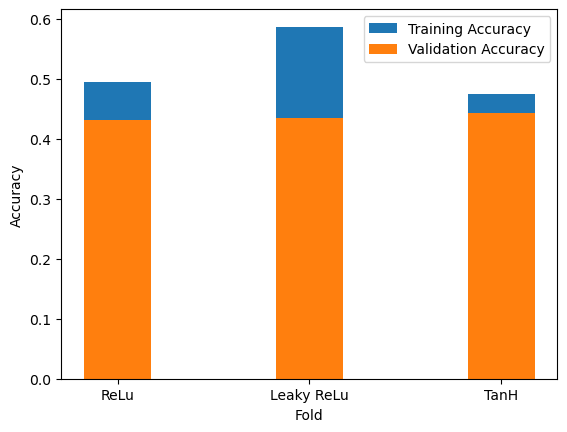

In [ ]:
# training and validation accuracy values
acc = [deep_nn_hist_6.history['acc'][-1], deep_nn_hist_6_lr.history['acc'][-1], deep_nn_hist_6_th.history['acc'][-1]]
val_acc = [deep_nn_hist_6.history['val_acc'][-1], deep_nn_hist_6_lr.history['val_acc'][-1], deep_nn_hist_6_th.history['val_acc'][-1]]

# define categories and bar width
categories = ['ReLu', 'Leaky ReLu', 'TanH']
bar_width = 0.35

# create figure and axis objects
fig, ax = plt.subplots()

# create bar plot for accuracy values
ax.bar(categories, acc, bar_width, label='Training Accuracy')
ax.bar([c for c in categories], val_acc, bar_width, label='Validation Accuracy')

# set axis labels and legend
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.legend()

# show plot
plt.show()

# Complex Neural Network Models

In [ ]:
lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(5, activation='softmax'))
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 130, 100)          22734600  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_42 (Dense)            (None, 5)                 645       
                                                                 
Total params: 22,852,493
Trainable params: 117,893
Non-trainable params: 22,734,600
_________________________________________________________________
None


In [ ]:
lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=100, epochs=15, verbose=1, validation_split=0.3)

Epoch 1/15
3920/3920 [==============================] - 58s 15ms/step - loss: 1.1621 - acc: 0.4889 - val_loss: 1.1170 - val_acc: 0.5094
Epoch 2/15
3920/3920 [==============================] - 58s 15ms/step - loss: 1.0975 - acc: 0.5197 - val_loss: 1.0840 - val_acc: 0.5267
Epoch 3/15
3920/3920 [==============================] - 57s 14ms/step - loss: 1.0616 - acc: 0.5362 - val_loss: 1.0627 - val_acc: 0.5355
Epoch 4/15
3920/3920 [==============================] - 58s 15ms/step - loss: 1.0359 - acc: 0.5481 - val_loss: 1.0464 - val_acc: 0.5432
Epoch 5/15
3920/3920 [==============================] - 58s 15ms/step - loss: 1.0147 - acc: 0.5582 - val_loss: 1.0447 - val_acc: 0.5440
Epoch 6/15
3920/3920 [==============================] - 59s 15ms/step - loss: 0.9971 - acc: 0.5668 - val_loss: 1.0458 - val_acc: 0.5446
Epoch 7/15
3920/3920 [==============================] - 58s 15ms/step - loss: 0.9805 - acc: 0.5744 - val_loss: 1.0483 - val_acc: 0.5447
Epoch 8/15
3920/3920 [==========================

In [ ]:
from keras.layers import Bidirectional
bilstm_model=Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
bilstm_model.add(embedding_layer)
#bilstm_model.add(Bidirectional(LSTM(64,return_sequences=True)))
bilstm_model.add(Bidirectional(LSTM(180,return_sequences=True)))
bilstm_model.add(Dropout(0.40))
bilstm_model.add(Bidirectional(LSTM(130)))
bilstm_model.add(Dropout(0.40))
bilstm_model.add(Dense(80))
bilstm_model.add(LeakyReLU(alpha=0.1))
bilstm_model.add(Dropout(0.30))
bilstm_model.add(Dense(5, activation='softmax'))

bilstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(bilstm_model.summary())

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 130, 100)          22734600  
                                                                 
 bidirectional_6 (Bidirectio  (None, 130, 360)         404640    
 nal)                                                            
                                                                 
 dropout_38 (Dropout)        (None, 130, 360)          0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 260)              510640    
 nal)                                                            
                                                                 
 dropout_39 (Dropout)        (None, 260)               0         
                                                                 
 dense_49 (Dense)            (None, 80)              

In [ ]:
'''
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight = "balanced", classes= np.unique(df['rating']), y= df ['rating'])

weights={}
for index, weight in enumerate(class_weights) :
  weights[index]=weight
'''

In [ ]:
bilstm_model_history = bilstm_model.fit(X_train, y_train, batch_size=100, 
                          epochs=10, verbose=1, validation_split=0.3)

Epoch 1/10
3920/3920 [==============================] - 261s 64ms/step - loss: 1.1918 - acc: 0.4784 - val_loss: 1.0873 - val_acc: 0.5237
Epoch 2/10
3920/3920 [==============================] - 256s 65ms/step - loss: 1.0839 - acc: 0.5275 - val_loss: 1.0533 - val_acc: 0.5382
Epoch 3/10
3920/3920 [==============================] - 249s 63ms/step - loss: 1.0432 - acc: 0.5458 - val_loss: 1.0356 - val_acc: 0.5488
Epoch 4/10
3920/3920 [==============================] - 257s 65ms/step - loss: 1.0116 - acc: 0.5609 - val_loss: 1.0186 - val_acc: 0.5574
Epoch 5/10
3920/3920 [==============================] - 256s 65ms/step - loss: 0.9848 - acc: 0.5729 - val_loss: 1.0124 - val_acc: 0.5604
Epoch 6/10
3920/3920 [==============================] - 256s 65ms/step - loss: 0.9584 - acc: 0.5848 - val_loss: 1.0175 - val_acc: 0.5600
Epoch 7/10
3920/3920 [==============================] - 257s 66ms/step - loss: 0.9339 - acc: 0.5965 - val_loss: 1.0308 - val_acc: 0.5589
Epoch 8/10
3920/3920 [===================

In [ ]:

test_loss_bl, test_accuracy_bl = bilstm_model.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', test_loss_bl)
print('Test Accuracy:', test_accuracy_bl)

4375/4375 [==============================] - 70s 15ms/step - loss: 1.0776 - acc: 0.5519
Test Loss: 1.0776139497756958
Test Accuracy: 0.5518785715103149


In [ ]:
bilstm_model.save('bilstm3_bal4.h5',save_format='h5')

In [ ]:
test_data = pd.read_csv("/kaggle/input/cs985-cs987-goodread-class-project/my_goodreads_test.csv")

In [ ]:
unseen_reviews = test_data['review_text']

unseen_processed = []
for review in unseen_reviews:
  review = preprocess_text(review)
  unseen_processed.append(review)

In [ ]:
# Tokenising instance with earlier trained tokeniser
unseen_tokenized = word_tokenizer.texts_to_sequences(unseen_processed)

# Pooling instance to have maxlength of 130 tokens
unseen_padded = pad_sequences(unseen_tokenized, padding='post', maxlen=maxlen)

In [ ]:
unseen_reviews = bilstm_model.predict(unseen_padded)

6250/6250 [==============================] - 89s 14ms/step


In [ ]:
predicted_labels=[np.argmax(i)+1 for i in unseen_reviews]
final_result=pd.DataFrame(test_data['review_id'])
s = pd.Series(predicted_labels)
final_result['rating']=s
final_result.to_csv('bilstm_5_balanceweight5.csv')

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(5, activation='softmax', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
tf.config.run_functions_eagerly(True)
model.fit(X_train, Y_train, epochs=10,verbose=1,validation_split=0.3)

# Results 
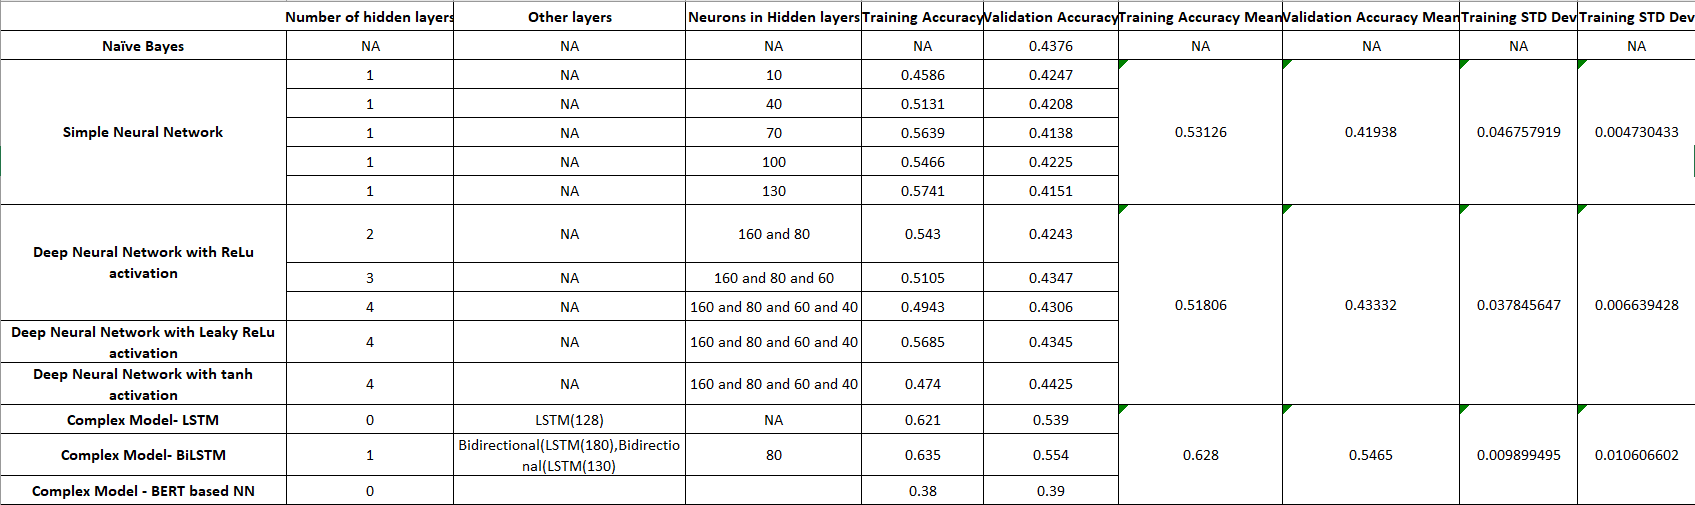



As we can observe from the table a complex model such as Bidirectional LSTM with a single hidden layer outperforms all other models. Apart from the model itself, there were several other factors that contributed to the performance of the model. One of the factors is the data preprocessing method. Using NLTK’s stop word list to remove stop words was more efficient than gensim’s remove_stopwords functions due to the higher number of stop words present in NLTK stop word list. Although techniques such as Bag of words Vectorizer (CountVectorizer), TF-IDF vectorizer, and Word2Vec word embedding on our dataset corpus were experimented with, the best results were obtained when we used a pre-trained Word2Vec word embedding vectors such as GloVe. Due to resource constraints, we could not experiment all the embedding techniques in conjunction with many complex models, hence we had to stick with GloVe for all the neural networks due to it’s superior performance and efficient use of resources. We did try to use BERT preprocessing function and BERT embeddings in conjunction with a simple neural network. However, it took 10 hours to train this model and as there was just a single neuron in the network, the results obtained were not optimal. With better resources, using embeddings from BERT based models would have yielded better results.

# Summary

After all the experimentation with all the models above it is very evident that Bidirectional LSTM has performed the best and it is no surprise since LSTM architecture is perfect for sequential data. In the case of GoodReads challenge the textual data identifies as sentiment analysis which in turn is a sequential data. The vanilla LSTM did outperform the simple neural network and Deep Neural network but with further enhancement by letting data flow in both directions in the network it becomes a Bidirectional LSTM and the best results are obtained. The best score our bidirectional LSTM scored in the Kaggle competition is 0.51391. For future work, we’d highly recommend using word embeddings from transformer networks like BERT. We did try to experiment with BERT but due to resources constraints we were not able to train BERT model with optimal parameters.